# Model Trained for 10 Epochs
for classes (agricultural, beach, buildings, forest, river)

## Resnet50 

| ![Image 1](resnet_model/resnet50_accuracy.png) | ![Image 2](resnet_model/resnet50_loss.png) |
|:------------------------------:|:------------------------------:|
| resnet50_accuracy.png                        | resnet50_loss.png                        |


## VGG16

| ![Image 1](VGG_model/VGG16_accuracy.png) | ![Image 2](VGG_model/VGG16_loss.png) |
|:------------------------------:|:------------------------------:|
| VGG16_accuracy.png              | VGG16_loss.png                 |


## inceptionV3

| ![Image 1](inceptionV3_model/inceptionV3_accuracy.png) | ![Image 2](inceptionV3_model/inceptionV3_loss.png) |
|:------------------------------:|:------------------------------:|
| inceptionV3_accuracy.png              | inceptionV3_loss.png                 |


## EfficientNetV2L

| ![Image 1](EfficientNetV2L_model/EfficientNet_accuracy.png) | ![Image 2](EfficientNetV2L_model/EfficientNet_loss.png) |
|:------------------------------:|:------------------------------:|
| EfficientNetV2L_accuracy.png              | EfficientNetV2L_loss.png                 |


## DenseNet121

| ![Image 1](DenseNet_model/DenseNet121_accuracy.png) | ![Image 2](DenseNet_model/DenseNet121_loss.png) |
|:------------------------------:|:------------------------------:|
| DenseNet121_accuracy.png              | DenseNet121_loss.png                 |


## MobileNet

| ![Image 1](mobileNet_model/mobileNet_accuracy.png) | ![Image 2](mobileNet_model/mobileNet_loss.png) |
|:------------------------------:|:------------------------------:|
| mobileNet_accuracy.png              | mobileNet_loss.png                 |


In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [25]:
my_resnet50 = tf.keras.models.load_model("D:/up/python/Feature_Extraction/resnet_model/1")
my_VGG16 = tf.keras.models.load_model("D:/up/python/Feature_Extraction/VGG_model/1")
my_inceptionV3 = tf.keras.models.load_model("D:/up/python/Feature_Extraction/inceptionV3_model/1")
my_EfficientNetV2L = tf.keras.models.load_model("D:/up/python/Feature_Extraction/EfficientNetV2L_model/1")
my_DenseNet = tf.keras.models.load_model("D:/up/python/Feature_Extraction/DenseNet_model/1")
my_mobileNet = tf.keras.models.load_model("D:/up/python/Feature_Extraction/mobileNet_model/1")
# Check its architecture
my_resnet50.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              0         
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 5)                0         
 pper)                                                           
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
____________________________________________

In [26]:
IMAGE_SIZE = 180
BATCH_SIZE = 32

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "RS_images", 
    shuffle = True, 
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)
class_names = dataset.class_names
class_names

Found 2500 files belonging to 5 classes.


['agricultural', 'beach', 'buildings', 'forest', 'river']

In [27]:
# plt.figure(figsize=(10, 10))
# for image_batch, label_batch in dataset.take(1):
#     for i in range(12):
#         ax = plt.subplot(3,4,i+1)
#         plt.imshow(image_batch[i].numpy().astype("uint8"))
#         plt.title(class_names[label_batch[i]])
#         plt.axis("off")

In [28]:
def predict (model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    
    return predicted_class, confidence

1/1 [==============================] - 0s 29ms/step


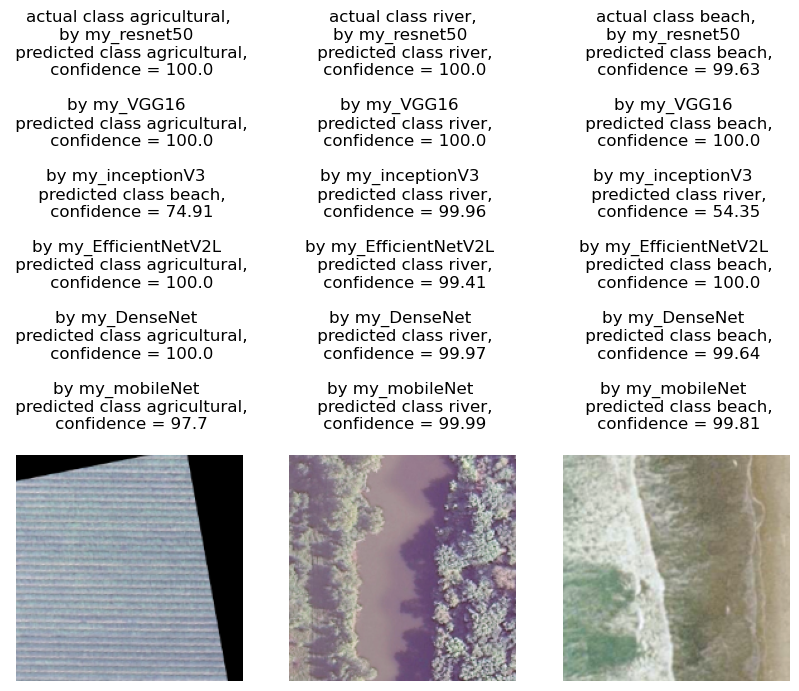

In [37]:
plt.figure(figsize=(10,10))
for images, labels in dataset.take(1):
    for i in range(3):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        resnet50_predicted_class, resnet50_confidence = predict(my_resnet50, images[i].numpy())
        VGG16_predicted_class, VGG16_confidence = predict(my_VGG16, images[i].numpy())
        inceptionV3_predicted_class, inceptionV3_confidence = predict(my_inceptionV3, images[i].numpy())
        EfficientNetV2L_predicted_class, EfficientNetV2L_confidence = predict(my_EfficientNetV2L, images[i].numpy())
        DenseNet_predicted_class, DenseNet_confidence = predict(my_DenseNet, images[i].numpy())
        mobileNet_predicted_class, mobileNet_confidence = predict(my_mobileNet, images[i].numpy())
        
        
        actual_class = class_names[labels[i]]
        
        plt.title(f'''actual class {actual_class},\nby my_resnet50 \n predicted class {resnet50_predicted_class},\n confidence = {resnet50_confidence}
                    \nby my_VGG16 \n predicted class {VGG16_predicted_class},\n confidence = {VGG16_confidence}
                    \nby my_inceptionV3 \n predicted class {inceptionV3_predicted_class},\n confidence = {inceptionV3_confidence}
                    \nby my_EfficientNetV2L \n predicted class {EfficientNetV2L_predicted_class},\n confidence = {EfficientNetV2L_confidence}
                    \nby my_DenseNet \n predicted class {DenseNet_predicted_class},\n confidence = {DenseNet_confidence}
                    \nby my_mobileNet \n predicted class {mobileNet_predicted_class},\n confidence = {mobileNet_confidence}
                  ''')
        
        plt.axis("off")  